# CS 105 Mini Project: Imposter Syndrome

For our topic, we decided to study how imposter syndrome impacts students in college. According to Oxford Dictionary, imposter syndrome is defined as “the persistent inability to believe that one's success is deserved or has been legitimately achieved as a result of one's own efforts or skills.” In short, it is a general feeling that one does not deserve to be at the position that they are at, whether it is in school, work, etc. We wanted to explore how college students at UCR experience imposter syndrome, specifically what contributes to these feelings, if at all. 

We will be exploring the following:
1. Does having a family member that is already in the career that you are aspiring to have have an impact on if you feel imposter syndrome?
2. Is there a strong correlation between high school gpa and college gpa? If so, does a correlation contribute to imposter syndrome?
3. Was there a specific class category (STEM vs Humanities) that was the overwhelming majority in contributing to a student's imposter syndrome?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [5]:
df = pd.read_csv(r'Survey_Responses.csv')
# create new dataframe with columns we want
df_new = df[['What is your current class standing?',
             ' What is your age?', 
             'What gender do you identify as?', 
             'What is your preferred domain of interest?',
             'What is your major? ',
             'After what event did you first think that you may want to major in computer science? (For example: After taking an AP CS class in high school, taking part in a coding competition, etc.)',
             'When did you take your first CS or CS-related Class?',
             'How many AP classes did you take during your high school?',
             'What was your (unweighted) high school GPA?',
             'What was the language that you wrote your first program in?',
             ' What is your range of cumulative GPA at UCR?',
             'What was your GPA your very first quarter at UCR?',
             'What influenced your decision to choose your current major/department at UCR?',
             'What are your career plans right after graduation?',
             'Do you have family members who have careers related to your career aspirations?',
             'How confident are you in being able to secure a position in the tech industry or some field related to computer science?',
             'How often if at all do you consider switching majors? ',
             'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [In high school]',
             'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Freshmen]',
             'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Sophomore]',
             'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Junior]',
             'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]',
             'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [Graduate School]',
             'If you have experienced imposter syndrome, what is the first class at UCR that you experienced imposter syndrome in? If you have not, type “Never” (Example: CS 225)',
             'If there are multiple classes contributing to your feeling of imposter syndrome, what other classes are they? If none, type “None”  (Example: CS 225)',
             'Rank how much you participate in class based on these class size: [Lecture less than 100 students]',
             'Rank how much you participate in class based on these class size: [Lecture greater than 100 students]',
             'Rank how much you participate in class based on these class size: [Discussion/lab greater than 30 students]',
             'Rank how much you participate in class based on these class size: [Discussion/lab less than 30 students ]',
             'Do you prefer to work on class assignments with partners / groups or by yourself for assignments',
             'On a scale of 1 - 5 how much did you experience imposter syndrome in your first quarter at UCR?',
             
]]

df_new.head()

,What is your current class standing?,What is your age?,What gender do you identify as?,What is your preferred domain of interest?,What is your major?,"After what event did you first think that you may want to major in computer science? (For example: After taking an AP CS class in high school, taking part in a coding competition, etc.)",When did you take your first CS or CS-related Class?,How many AP classes did you take during your high school?,What was your (unweighted) high school GPA?,What was the language that you wrote your first program in?,...,When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently) [College Senior],When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently) [Graduate School],"If you have experienced imposter syndrome, what is the first class at UCR that you experienced imposter syndrome in? If you have not, type “Never” (Example: CS 225)","If there are multiple classes contributing to your feeling of imposter syndrome, what other classes are they? If none, type “None” (Example: CS 225)",Rank how much you participate in class based on these class size: [Lecture less than 100 students],Rank how much you participate in class based on these class size: [Lecture greater than 100 students],Rank how much you participate in class based on these class size: [Discussion/lab greater than 30 students],Rank how much you participate in class based on these class size: [Discussion/lab less than 30 students ],Do you prefer to work on class assignments with partners / groups or by yourself for assignments,On a scale of 1 - 5 how much did you experience imposter syndrome in your first quarter at UCR?
0,Senior,23+,Male,Cybersecurity,CS,Learning to program in high school,College,4,3.5 - 4.0,C++,...,2.0,NaN,NaN,NaN,1 (Most likely to participate),4 (Least likely to participate),3,2,Alone,4.0
1,Junior,20,Female,Data Science,Data Science,NaN,High School,6,3.5 - 4.0,Java,...,NaN,NaN,CS10B,"CS10C, Cs111, Cs166, cs105, stat11",3,4 (Least likely to participate),2,1 (Most likely to participate),Alone,5.0
2,Junior,23+,Female,Machine learning and Data mining,CS,COVID,College,0,2.5 - 3.0,C++,...,NaN,NaN,ENGR001,ENGR Series,1 (Most likely to participate),1 (Most likely to participate),1 (Most likely to participate),1 (Most likely to participate),Alone,3.0
3,Senior,23+,Male,Embedded Systems,CS,AP CS class in highschool,High School,3,3.5 - 4.0,Java,...,3.0,NaN,CS 100,NaN,1 (Most likely to participate),1 (Most likely to participate),1 (Most likely to participate),1 (Most likely to participate),With a random partner,3.0
4,Graduate,22,Male,Machine learning and Data mining,CS,AP CS class,High School,13,3.5 - 4.0,Java,...,3.0,2.0,CS014,NaN,2,2,2,2,Alone,2.0


### Data Cleaning

In [6]:
# clean particular values (ie. 1 (Most likely to participate) -> 1)

# Column: Rank how much you participate in class based on these class size: [Lecture less than 100 students]
# default value: -1
# type: int
columns = ["Rank how much you participate in class based on these class size: [Lecture less than 100 students]", 
           "Rank how much you participate in class based on these class size: [Lecture greater than 100 students]",
           "Rank how much you participate in class based on these class size: [Discussion/lab greater than 30 students]",
           "Rank how much you participate in class based on these class size: [Discussion/lab less than 30 students ]"
           ]

df[columns] = df[columns].replace("1 (Most likely to participate)", "1").replace("4 (Least likely to participate)", "4").fillna(-1).astype(int)

# testing to ensure that all possible values are integers
# df["Rank how much you participate in class based on these class size: [Lecture less than 100 students]"].unique()
# df["Rank how much you participate in class based on these class size: [Lecture greater than 100 students]"].unique()
# df["Rank how much you participate in class based on these class size: [Discussion/lab greater than 30 students]"].unique()
# df["Rank how much you participate in class based on these class size: [Discussion/lab less than 30 students ]"].unique()

In [7]:
# clean particular values (ie. 6 (Least Important) -> 6)

# Column: I attended higher education because... 
# default value: -1
# type: int
columns = ["I attended higher education because... [Most of my friends did as well]", 
           "I attended higher education because... [It was the best choice for my career]",
           "I attended higher education because... [I wanted a career with a higher than average salary]",
           "I attended higher education because... [I wanted to have more college experiences]",
           "I attended higher education because... [I love learning]",
           "I attended higher education because... [Other]"
           ]

df[columns] = df[columns].replace("1 (Most Important)", "1").replace("6 (Least Important)", "6").fillna(-1).astype(int)

In [9]:
# fancy regex to grab all numbers from a string, since results such as "15-16" and "17 units" exist
def grab_numbers(string):
    instances = re.findall(r'-?\d+.?\d+', str(string))

    if len(instances) == 0:
        return -1
    # NOTE: MIGHT WANT TO CONSIDER TAKING MEAN INSEAD
    return max(instances)

# follows bin patterns with other GPA questions
gpa_bins = [0, 2.0, 2.5, 3.0, 3.5, 4.0]

In [10]:
# Column: What was your GPA your very first quarter at UCR?
# default value: -1
# type: int

columns = "What was your GPA your very first quarter at UCR?"

df[columns] = df[columns].fillna("-1").apply(grab_numbers).astype(float)

df[columns] = pd.cut(df[columns], gpa_bins)

# all possible BIN values
# df["What was your GPA your very first quarter at UCR?"].unique()

In [11]:
# Column: What is your range of cumulative GPA at UCR?
# default value: -1
# type: int

df["What is your range of cumulative GPA at UCR?"] = df[" What is your range of cumulative GPA at UCR?"]

columns = "What is your range of cumulative GPA at UCR?"

df[columns] = df[columns].fillna("-1").apply(grab_numbers).astype(float)

df[columns] = pd.cut(df[columns], gpa_bins)

# all possible BIN values
# df["What is your range of cumulative GPA at UCR?"].unique()

### Question 1: What data do you have?
We have data from two computer science classes about various aspects of their academic life that may contribute to their feeling of imposter syndrome if any:
- cumulative GPA from high school
- gender
- high school GPA
- college GPA
- amount of family members with careers related to career aspirations
- rating how confident in finding a job
- rating how much imposter syndrome faced at each year (high school, college freshmen, sophomore, junior, senior, graduate school)
- the first class at ucr that you experienced imposter syndrome in
- rate how much imposter syndrome you felt in your first quarter at UCR
- what influenced your decision to choose your major

### Question 2: What would you like to know?
1) Does gender contribute to the feeling of imposter syndrome?
2) Was there a specific class category (STEM vs Humanities) that was the overwhelming majority in contributing to a student's imposter syndrome?
3) Is there a strong correlation between high school gpa and college gpa? If so, does a correlation contribute to imposter syndrome? 
4) How did a persons feeling of imposter syndrome change over the years of college?
5) How does a students participation reflect on their feeling on imposter syndrome? 
6) Does having a family member that is already in the career that you are aspiring to have have an impact on if you feel imposter syndrome?

### Question 3: Explore data

Text(0.5, 1.0, 'Amount of people who ranked how they felt imposter syndrome in their first quarter at UCR')

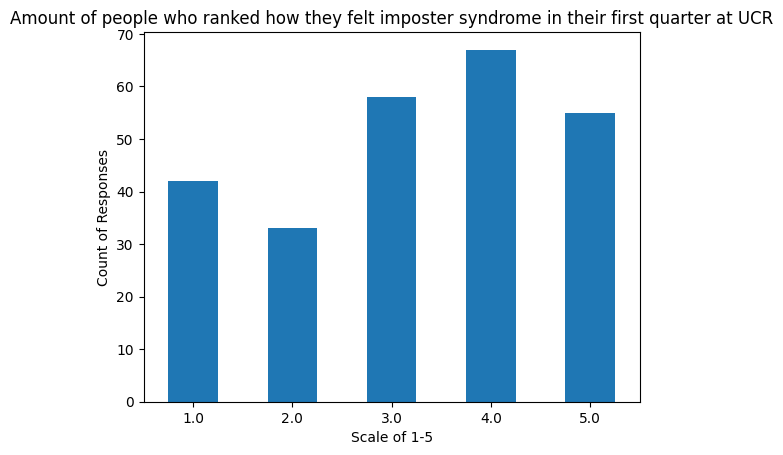

In [12]:
column = 'On a scale of 1 - 5 how much did you experience imposter syndrome in your first quarter at UCR?'
gender = 'What gender do you identify as?'

first_quarter = df[column].value_counts().sort_index()
first_quarter.plot.bar(xlabel='Scale of 1-5', ylabel='Count of Responses', rot=0).set_title("Amount of people who ranked how they felt imposter syndrome in their first quarter at UCR")

The bar graph depicts the distribution of individuals based on their self-reported levels of imposter syndrome during their first quarter at UCR. The majority of respondents fell within the range of 3 to 5, indicating that a significant number of participants experienced imposter syndrome to some degree. Conversely, fewer individuals assigned a rating of 2 or 1. Before exploring potential connections between imposter syndrome and other variables among UCR students, our initial focus is on understanding the overall prevalence of imposter syndrome feelings itself. Creating a bar chart enables us to visually compare the quantities among the five groups, making it easy to observe the patterns in the data.

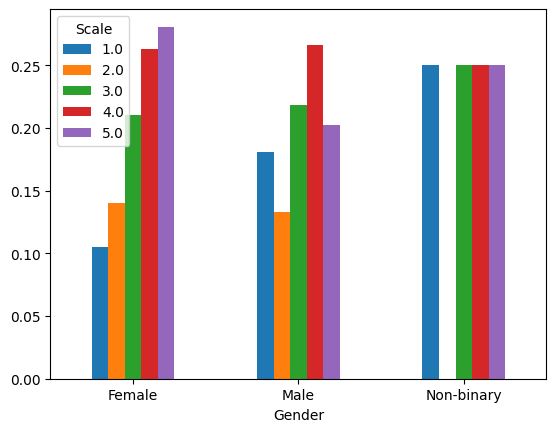

In [13]:
filter_pnts = df[gender] != 'Prefer not to say' # these lines are to create a new column without the 'Prefer not to say' responses
df['Filtered'] = df.loc[filter_pnts, gender] # so that it does not show up in the groupby and bar graph
first_q = df.groupby('Filtered')[column].value_counts(normalize=True) 
first_q = first_q.unstack().fillna(0)
first_q.plot.bar(xlabel='Gender', rot=0).legend(title='Scale')

By incorporating gender as an additional variable in the analysis of imposter syndrome feelings, this bar chart aims to assess whether gender influences the likelihood of experiencing such feelings. To address the substantial difference in participation between males and females, we opted to normalize the data instead of presenting raw counts. This approach allows us to examine the distribution of imposter syndrome feelings within each gender category, rather than across the entire group of participants. Furthermore, the limited number of non-binary respondents, totaling only four, prevented us from drawing meaningful correlation results. Each respondent provided a different response for their feelings of imposter syndrome, resulting in an even distribution, however the small sample size restricts the reliability of any conclusive findings. 

Upon analyzing the rest of bar chart, we can see that female students demonstrated a higher percentage of assigning their feelings of imposter syndrome to a 4 or 5 than male students. Similarly, we can also note that male students show a higher rate of assigning their feelings to a 1 or 2 than female students. However, it is still important to note that both genders share the fact that 4 is their most prominent ranking.  

Text(0.5, 1.0, 'In what class did students first experience imposter syndrome at UCR?')

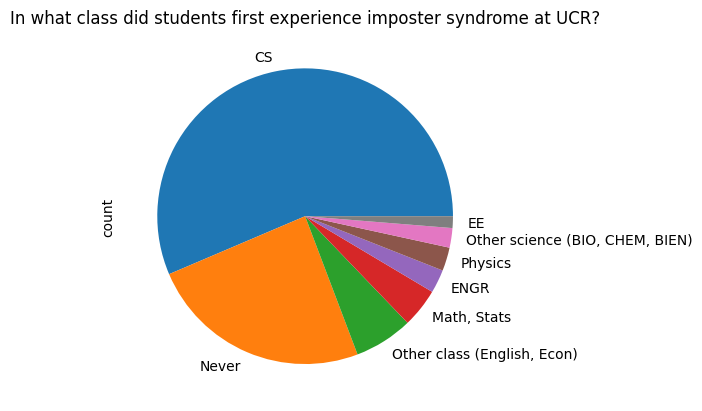

In [14]:
col = "If you have experienced imposter syndrome, what is the first class at UCR that you experienced imposter syndrome in? If you have not, type “Never” (Example: CS 225)"

def what_class(input):
    input = str(input)
    if input.startswith(('cs', 'CS', 'Cs')) or 'computer' in input or 'CS' in input:
        return 'CS'
    elif input.startswith(('PHYS', 'phys', 'Ph')) or 'PHYS'.casefold() in input:
        return 'Physics'
    elif input.startswith(('Math', 'math', 'STAT', 'stat', 'Stat')) or 'Math' in input:
        return 'Math, Stats'
    elif input.startswith(('EE', 'ee')) or 'EE'.casefold() in input:
        return 'EE'
    elif input.startswith(('Never', 'NEVER', 'never')) or 'never' in input:
        return 'Never'
    elif input.startswith(('ENGR', 'engr', 'ENG')):
        return 'ENGR'
    elif "chem".casefold() in input:
        return 'CHEM'
    elif input.startswith(('BIO', 'bio', 'Bio', 'Chem', 'CHEM', 'BIEN')):
        return 'Other science (BIO, CHEM, BIEN)'
    else:
        return 'Other class (English, Econ)'

first_classes = df[col].dropna().apply(what_class).value_counts()
first_classes.plot.pie(y=col).set_title('In what class did students first experience imposter syndrome at UCR?')

In the presented visualization, we show the distribution of college classes where UCR students initially experienced imposter syndrome. To emphasize the impact of CS classes on participants' imposter syndrome, we opted for a pie chart as the chosen method, despite the number of categories we had. To help categorize our data more effectively, we organized the class data we received into groups based on their respective departments. Additionally, we created a generalized category for classes outside the STEM field, due to them being specific and of lower quantity individually. It is noteworthy that around 25% of students reported never experiencing imposter syndrome due to a class at UCR, a proportion larger than those who reported feeling imposter syndrome in all classes outside of the CS department, with the main components being Math/Stats and Physics. 

[Text(0.5, 1.0, 'How much imposter syndrome students felt in their last quarter at UCR vs. confidence in finding a job in the tech industry'),
 Text(0, 0.5, 'Job Confidence Rating'),
 Text(0.5, 0, 'Impostor Syndrome Rating (Senior Year)')]

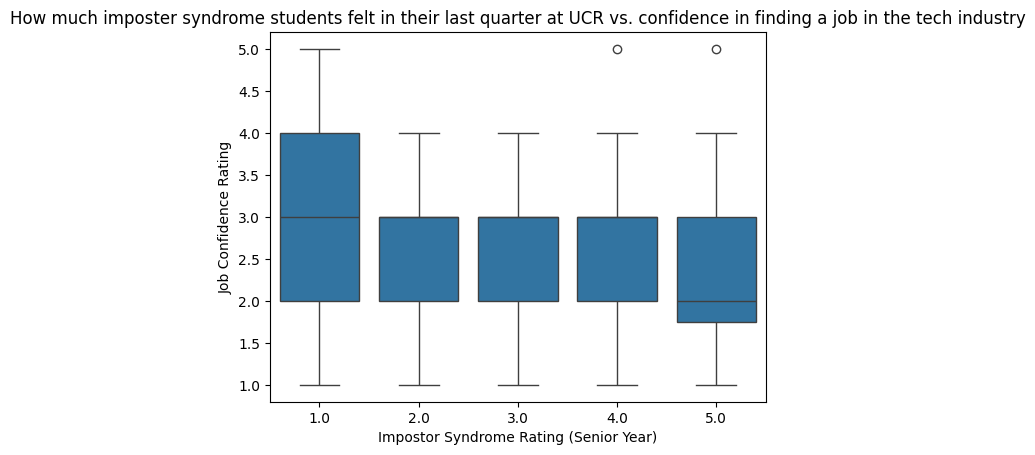

In [15]:
confidence = 'How confident are you in being able to secure a position in the tech industry or some field related to computer science?'
impostor = 'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]'
df['Seniors'] = df[impostor].dropna()
sns.boxplot(data=df, x=df['Seniors'], y=df[confidence]).set(title='How much imposter syndrome students felt in their last quarter at UCR vs. confidence in finding a job in the tech industry', ylabel='Job Confidence Rating', xlabel='Impostor Syndrome Rating (Senior Year)')

Using the series of boxplots above, we visualize the relationship between the feelings of imposter syndrome during one's senior year of college, and their confidence in finding a job in their respective field. We chose boxplots to visualize the differences between the ranks as the differences in the rank 1 and rank 5 groups are apparent in this format. While ranks 2 through 4 have neutral boxplots, the most notable difference occur in ratings 1 and 5. For rank 1, the boxplot displays a notably higher median and taller whiskers. This suggests that individuals experiencing less or no imposter syndrome tend to exhibit greater confidence in finding jobs within the tech industry. Conversely, in the rank 5 boxplot, the median is comparatively lower, and the first quartile dips below those of other categories. This indicates that individuals with higher imposter syndrome tend to report lower confidence in securing jobs.

Text(0.5, 1.0, 'Highschool Cumulative GPA vs UCR Cumulative GPA')

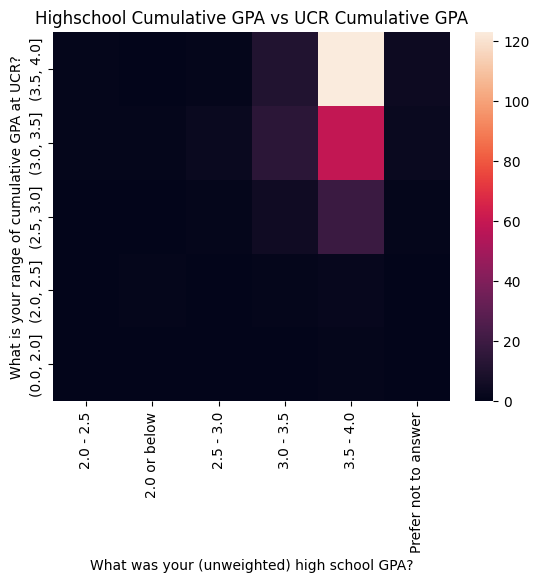

In [19]:
heatmap = pd.crosstab(df["What is your range of cumulative GPA at UCR?"], df["What was your (unweighted) high school GPA?"])

ax = sns.heatmap(heatmap)
ax.invert_yaxis()
ax.set_title('Highschool Cumulative GPA vs UCR Cumulative GPA')

We developed a visualization to receive some insight into any potential correlations of students' GPAs during high school compared to their college GPAs. The primary objective of this visualization was to understand the demographics of the surveyed participants and identify patterns that could influence our analysis of imposter syndrome in other contexts. We decided on using a heatmap for this visualization, as it is a convenient way to display categorical data against each other, as well as the heatmap being cohesive with the range-like structure of each bin (e.g., 3.5 - 4.0). 

Initially, it's evident that a large majority of participants have maintained a GPA above 3.5, either during high school, college, or in both. The visualization indicates a clear trend where students who maintained a higher GPA in high school generally continued to achieve a relatively higher GPA in college. Predominantly, students with high school GPAs falling within the 3.5 - 4.0 range continued this trend, displaying college GPAs within the same 3.5 - 4.0 range. However, a notable proportion of students experienced a slight decrease in GPA, as indicated by the pink area on the heatmap, but this reduction was generally minimal. Additionally, a smaller proportion of students also noticed the opposite trend, improving their GPA once enrolled in college. 

Text(0.5, 0, 'Level of Education')

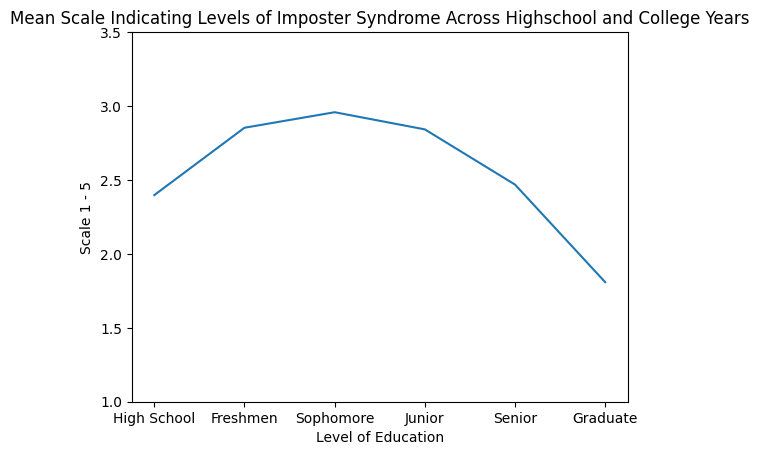

In [20]:
parallel = df[[
                'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [In high school]', 
                'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Freshmen]',
                'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Sophomore]',
                'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Junior]',
                'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]',
                'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [Graduate School]'
            ]]
parallel2 = parallel.mean()

parallel2 = pd.DataFrame(parallel2)

rename = {
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [In high school]': "High School",
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Freshmen]': "Freshmen",
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Sophomore]': "Sophomore",
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Junior]': "Junior",
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]': "Senior",
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [Graduate School]': "Graduate",
}

parallel2.rename(rename, inplace=True)

ax = parallel2.plot.line(ylim=(1, 3.5), legend = False)
ax.set_title("Mean Scale Indicating Levels of Imposter Syndrome Across Highschool and College Years")
ax.set_ylabel("Scale 1 - 5")
ax.set_xlabel("Level of Education")

To demonstrate the relationship between feelings of imposter syndrome and the level of education, we constructed a time series graph to visualize the pattern between the two variables. Since we were dealing with change over time, we felt that this was the most appropriate visualization. The graph reveals a distinct parabolic pattern, reaching its peak during the sophomore year of college. The transition into a new campus/city/state/country and higher education appears to coincide with an increase in imposter syndrome feelings among students. However, as students gradually acclimate to their peers and academic challenges, there is a noticeable decline in reported feelings of imposter syndrome, even into graduate-level students.

Text(0.5, 1.0, 'Students picking their current major in relation to family members in major')

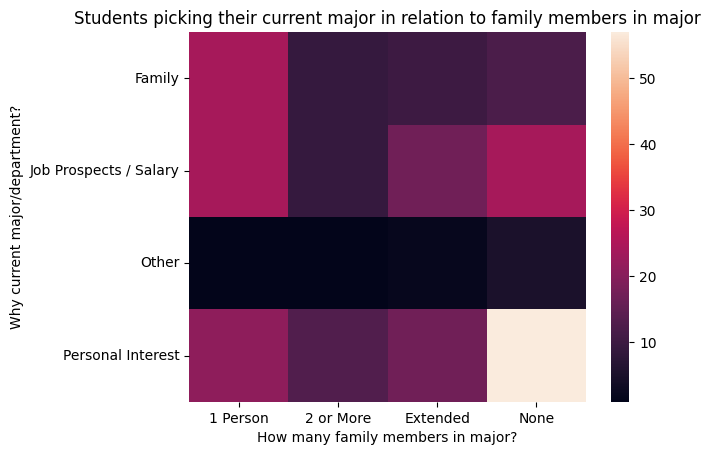

In [21]:
def shorten_names(value):
    if value == "1 person in my immediate family (parent/legal guardian or sibling)":
        return "1 Person"
    elif value == "2 or more in my immediate family (parents/legal guardians or siblings)":
        return "2 or More"
    elif value == "Extended family (Aunts, uncles, cousins)":
        return "Extended"
    elif value == "No family in related fields/careers":
        return "None"

def fix_names(value):
    value = str(value)
    if any(re.findall(r'parent|family|sister|cousin', value, re.IGNORECASE)):
        return "Family"
    elif any(re.findall(r'salary|job', value, re.IGNORECASE)):
        return "Job Prospects / Salary"
    elif any(re.findall(r'self|passion|math|major', value, re.IGNORECASE)):
        return "Personal Interest"
    return "Other"
    
influence = df["What influenced your decision to choose your current major/department at UCR?"]

family_members = df["Do you have family members who have careers related to your career aspirations?"]

influence = influence.dropna().apply(fix_names)
family_members = family_members.dropna().apply(shorten_names)

df["Why current major/department?"] = influence
df["How many family members in major?"] = family_members

heatmap = pd.crosstab(df["Why current major/department?"], df["How many family members in major?"])

ax = sns.heatmap(heatmap)
ax.set_title("Students picking their current major in relation to family members in major")


To show the relationship between familial interest and influence on major choices, we constructed another heatmap to compare these categorical variables. We chose this method so that we could easily compare the two dimensions in comparison to each other, while being able to easily follow the two axes. Analysis of the heatmap reveals that a significant number of students without familial connections in their field were primarily driven by personal interest in their major choices. On the contrary, individuals with family members in the same field more frequently attributed their major decisions to familial influence, surpassing even salary motivations. However, this relationship is not as well-defined as some of the other visualizations we have produced. This relationship between family members and primary motivation for education path does not seem as strong as we initially hypothesized. 

[Text(0.5, 1.0, 'Average Imposter Syndrome over all years of school vs. cumulative UCR GPA')]

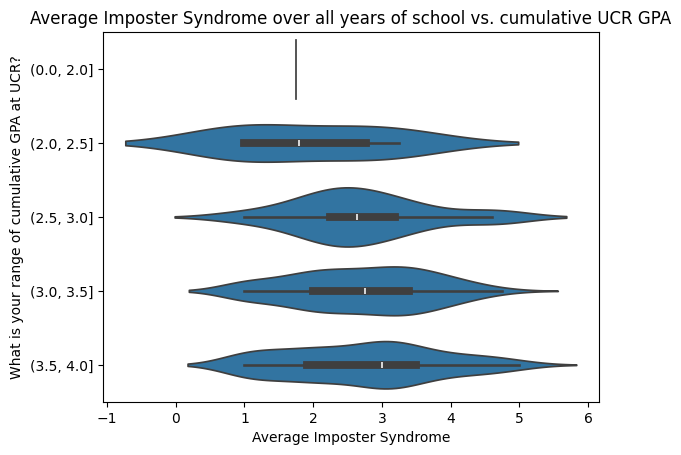

In [32]:
parallel = parallel.mean(axis=1)

parallel = pd.DataFrame(parallel)
df['Average Imposter Syndrome'] = parallel


ranges = df["What is your range of cumulative GPA at UCR?"].dropna()

sns.violinplot(data=df, x='Average Imposter Syndrome', y=ranges).set(title='Average Imposter Syndrome over all years of school vs. cumulative UCR GPA')

For our final visualization, we aimed to examine the overall connection between individuals' levels of imposter syndrome and their cumulative GPA at UCR. Given the binned nature of our GPA data, we decided to utilize a series of violin charts. These charts effectively portray not only the five-number summary for the for each group but also allow us to observe the density of our dataset through the inclusion of density curves.
One noteworthy observation is the absence of a plot for the (0.0, 2.0] GPA bin. This absence is reasonable, as maintaining a 2.0 GPA is required to be in good academic standing at the university, leading to an expected limited dataset of participants in this particular group. Furthermore, by focusing on the white median lines, we can notice a consistent upward trend across all GPA bins. The highest GPA bin displays the highest median, while the lowest GPA bin exhibits the lowest median. This trend provides valuable information about the relationship between imposter syndrome and academic performance, revealing a positive correlation between the two.

During the analysis of the density curves, we observed an anomaly in the chart for the (2.0, 2.5] GPA bin, where the curve extended beyond the actual range of our data. We predict this to have been caused by the limited number of data points in this specific violin chart, combined with a relatively even distribution, leading to the stretching of the curve. Examining the density curves for the lower two bins, we noticed that the highest density is slightly below the median. This observation suggests a higher proportion of students within these bins have reported experiencing fewer feelings of imposter syndrome. In contrast, for the higher two bins, the density curves exhibit their highest points slightly above the median. This pattern indicates that a higher proportion of students within these GPA ranges report experiencing more pronounced feelings of imposter syndrome.

### Question 4: Can you state any hypothesis and make predictions?

We can state the following hypotheses:
1. Having a family member in the career you are interested in correlates to feelings of imposter syndrome.
2. Choosing to study your career because of salary or your parents will result in experiencing more imposter syndrome than if you chose it out of interest or passion. 
3. Students with higher GPAs in college and highschool would experience imposter syndrome more than students with lower GPAs

For #1 and #2 we can use the chi squared test to verify our hypothesis, while for #3 we can use the Pearson correlation test. 

### Question 5: Testing Hypothesis and Predictions


1. Having a family member in the career you are interested in makes you less likely to experience imposter syndrome.


In [22]:
from scipy.stats import chi2_contingency

df_familycareer = df[[
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [In high school]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Freshmen]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Sophomore]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Junior]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [Graduate School]',
    'Do you have family members who have careers related to your career aspirations?',
]]

column_mapping = {
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [In high school]': 'High_School',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Freshmen]': 'College_Freshmen',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Sophomore]': 'College_Sophomore',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Junior]': 'College_Junior',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]': 'College_Senior',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [Graduate School]': 'Graduate_School',
    'Do you have family members who have careers related to your career aspirations?': 'Family_Career'
}

df_familycareer = df_familycareer.rename(columns=column_mapping)

chi2_results = {}

family_career_column = 'Family_Career'

for column in df_familycareer.columns[:-1]:
    crosstab = pd.crosstab(df_familycareer[column], df_familycareer['Family_Career'])

    chi2, p, dof, expected = chi2_contingency(crosstab)
    
    # Print the chi-squared test result
    print(f"\nChi-squared test result for '{column}' and 'Family_Career':")
    print("Chi-squared Statistic:", chi2)
    print("P-value:", p)
    print("\n-------------------------------------------------------\n")
    


Chi-squared test result for 'High_School' and 'Family_Career':
Chi-squared Statistic: 18.054105937780577
P-value: 0.11405752763111122

-------------------------------------------------------


Chi-squared test result for 'College_Freshmen' and 'Family_Career':
Chi-squared Statistic: 18.496659116250477
P-value: 0.10142133316929595

-------------------------------------------------------


Chi-squared test result for 'College_Sophomore' and 'Family_Career':
Chi-squared Statistic: 14.176746184164568
P-value: 0.28956432088241507

-------------------------------------------------------


Chi-squared test result for 'College_Junior' and 'Family_Career':
Chi-squared Statistic: 24.354056042531376
P-value: 0.0181985039446778

-------------------------------------------------------


Chi-squared test result for 'College_Senior' and 'Family_Career':
Chi-squared Statistic: 13.495888628918813
P-value: 0.3340501234538227

-------------------------------------------------------


Chi-squared test re

Our null hypothesis is that the scale at which somone feels imposter syndrome feeling is independendent of whether they have a family member whose career is related to their career aspirations

Our alternative hypothesis is that there is a correlation between the scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations

High School: For high school, since the p value, 0.11 is greater than the alpha significance level of 0.05 we can reject the null concluding that there is a correlation between scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations

College Freshmen: For college freshmen, since the p value, 0.10, is greater than the alpha significance level of 0.05 we can reject the null concluding that there is a correlation between scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations


College Sophomores: For college sophomores, since the p value, 0.29, is greater than the alpha significance level of 0.05 we can reject the null concluding that there is a correlation between scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations

College Juniors: For college juniors, since the p value, 0.018, is less than the alpha significance level of 0.05 we can accept the null concluding that the scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations are independent

College Seniors: For college seniors, since the p value, 0.33, is greater than the alpha significance level of 0.05 we can reject the null concluding that there is a correlation between scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations

Graduate School: For high school, since the p value, 0.13, is greater than the alpha significance level of 0.05 we can reject the null concluding that there is a correlation between scale at which somone feels imposter syndrome feeling and whether they have a family member whose career is related to their career aspirations


2. STEM classes would result in a higher percentage of students feeling imposter syndrome over Humanities classes


In [23]:
imposter_syndrome_cols = [
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [In high school]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Freshmen]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Sophomore]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Junior]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [College Senior]',
    'When have you experienced imposter syndrome and was it frequent? (for each - 1 for no imposter syndrome to 5 for very frequently)  [Graduate School]',
]

average_imposter_syndrome = df[imposter_syndrome_cols].mean(axis=1)

df['Average Imposter Syndrome'] = average_imposter_syndrome

df['Average Imposter Syndrome'].fillna(0, inplace=True)

crosstab = pd.crosstab(df['Average Imposter Syndrome'], influence)

chi2, p, dof, expected = chi2_contingency(crosstab)
    
chi2_results_career = chi2_contingency(crosstab)

print(f"\nChi-squared test result for Average Imposter Syndrome and Reason for Choosing current major/department at UCR:")
print("Chi-squared Statistic:", chi2)
print("P-value:", p)    


Chi-squared test result for Average Imposter Syndrome and Reason for Choosing current major/department at UCR:
Chi-squared Statistic: 138.40617706167063
P-value: 0.26986543705515437


Our null hypothesis is that Average Imposter Syndrome and Reason for Choosing current major/department at UCR are independent

Our alternate hypothesis is that Average Imposter Syndrome and Reason for Choosing current major/department at UCR are correlated

Based on our p value of 0.27 and using an alpha significance level of 0.05 we can conclude that  Average Imposter Syndrome and Reason for Choosing current major/department at UCR are correlated since our p value is greater than our alpha significance level 

3. Students with higher GPAs in college and highschool would experience imposter syndrome less than students with lower GPAs


In [24]:
df['Cumulative GPA Averages'] = df['What is your range of cumulative GPA at UCR?'].apply(lambda x: (x.right+x.left)/2)
df.loc[:, 'Cumulative GPA Averages'] = df['Cumulative GPA Averages'].astype(float)
df['Cumulative GPA Averages'] = pd.to_numeric(df['Cumulative GPA Averages'], errors='coerce')
df['Cumulative GPA Averages'].fillna(0, inplace=True)

df = df.replace({'What was your (unweighted) high school GPA?':{'Prefer not to answer': 0,
                                                                '2.0 or below': 1.0, 
                                                                '2.0 - 2.5': 2.25,
                                                                '2.5 - 3.0': 2.75,
                                                                '3.0 - 3.5': 3.25,
                                                                '3.5 - 4.0': 3.75
}})
df['What was your (unweighted) high school GPA?'].fillna(0, inplace=True)

correlation_hs_ucr = df['What was your (unweighted) high school GPA?'].corr(df['Cumulative GPA Averages'])
print("Pearson Correlation coefficient between high school and cumulative UCR GPAs:", correlation_hs_ucr)

Pearson Correlation coefficient between high school and cumulative UCR GPAs: 0.42808782079829816


Based on the the Pearson Correlation test, we got a correlation coefficient of 0.428. This value indicates that there is a moderate positive correlation between unweighted high school GPA and a UCR student's cumulative GPA average. Now that we know that there is a correlation between the two, we can conduct another correlation test to see if higher cumulative UCR gpas correlate to higher levels of imposter syndrome. 

In [25]:
correlation_hs_ucr = df['Cumulative GPA Averages'].corr(df['Average Imposter Syndrome'])
print("Pearson Correlation coefficient between cumulative UCR GPAs and how much someone experiences imposter symdrome:", correlation_hs_ucr)

Pearson Correlation coefficient between cumulative UCR GPAs and how much someone experiences imposter symdrome: 0.09146303976346633


Based on these results, we can see that the Pearson Correlation Coefficient is 0.0915. This means that there is nearly no correlation between GPA and how much a student experiences imposter syndrome, meaning that it is unlikely that students with higher GPAs experience less imposter syndrome than those with lower GPAs.

### Question 6: Conclusions


Based on our analysis of the effects of imposter syndrome, we can conlcude that there are some defining factors that correlate to someone experiencing more feelings of imposter syndrome. 

Through the visualizations presented in question #3, the pie chart demonstrates an emphasis on how CS classes are the highest contributers of imposter syndrome in our group of participants. Since these participants were all taking CS classes, and were not gauranteed to be taking classes in other departments as frequently, we assumed that the imposter syndrome we would be focusing the heaviest on would be CS-related, which was shown true. Furthermore, we found that female participants on average felt stronger feelings of imposter syndrome than male participants, as they were more likely to report lower/no feelings of imposter syndrome. These results can be attributed to the fact that the population in which we pulled participants from is a strongly male-dominated field, which could explain why females could feel more imposter syndrome on average. Additionally, the strong parabolic curve presented in the time series graph shows a gradual change in these feelings in students as they move from highschool to college, increasing their feelings of imposter syndrome, and as they move into their upper-divisions and post-grad, these feelings decrease on average. Lastly, we noticed a pattern through the series of boxplots that participants that reported lower feelings of imposter syndrome were more confident in finding a job in the tech industry, which is to be expected if these people don't feel as inadequate in their field.

In the hypothesis testing presented in question #4, we found that there is a correlation between those who have family in the same career as their field, and having higher feelings of imposter syndrome in highschool, and all college standings other than junior year, where our chi-squared test had failed. This aligns with what our initial hypothesis was, as we believed that having family in the same field as you would have a significant impact on your confidence in these classes, and thus your feelings of imposter syndrome.
Similarly in our second test, we found that there is a correlation between feelings of imposter syndrome and reason for choosing their major at UCR. This also aligns with our initiali hypothesis, as we assumed that people who were influenced by friends or family into pursuing their major would experience potentially more imposter syndrome than someone who pursued their major based off of personal passion/interest. While our chi-squared test doesn't give us insight towards whether it is an increase or decrease, we are aware there is a correlation based on the type of influence. 
Lastly, we decided to take the pearson correlation coefficient between cumulative GPA of UCR students and their reported feelings of imposter syndrome. In our hypothesis, we predicted that students with higher GPA would experience more imposter syndrome, as imposter syndrome results from the insecurities of successful individuals in their field. However, after conducting the Pearson correlation test, we got a coefficient of .09, showing that there is essentially no linear correlation between GPA and imposter syndrome feelings, which came as a shock. In the future if provided with the resources, we could have dived deeper into more demographics of the students to see if there was some other indicator of success which could have shown a correlation. 

Overall, through this project we found that imposter syndrome relates to many of the variables we had hypothesized, including familial influence, gender, level of education, and confidence. 